In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)

# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
8.131763296000003
GPU (s):
0.10288802200000191
GPU speedup over CPU: 79x


In [3]:
# Neural network from scratch

# We need one function to run the gradient
# We need to one function update the parameters
# we need one function to define the neural net architecture

In [6]:
import os
from pathlib import Path
!pip install kaggle


OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.

In [7]:
creds ='{"username":"anirbanchatterjee","key":"ecd5059c7325ba1c2817c584d12bbdf4"}'
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

path = Path('titanic')
if not iskaggle and not path.exists():
    import zipfile,kaggle
    kaggle.api.competition_download_cli(str(path))
    zipfile.ZipFile(f'{path}.zip').extractall(path)

100%|██████████| 34.1k/34.1k [00:00<00:00, 10.7MB/s]

In [10]:
!cd /content/titanic/
!ls

/bin/bash: line 1: cd: /content/titanic/titanic/: No such file or directory
sample_data  titanic  titanic.zip


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [13]:
df_train = pd.read_csv('/content/titanic/train.csv')

In [14]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [42]:
modes = df_train.mode().iloc[0]
type(modes)
df_train.fillna(modes,inplace=True)

In [43]:
df_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [44]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [48]:
from math import log
df_train['logFare'] = df_train['Fare'].apply(lambda x: log(x+1))
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,logFare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,2.110213
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4.280593
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,2.188856
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.990834
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,2.202765


<Axes: >

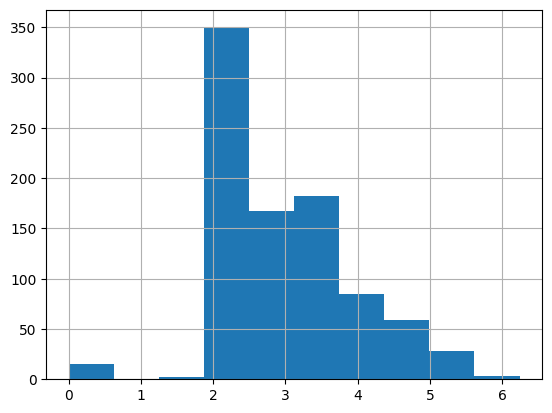

In [50]:
df_train['logFare'].hist()

In [51]:
df_train = pd.get_dummies(df_train, columns=["Sex", "Pclass", "Embarked"])
df_train.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'logFare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [52]:
from torch import tensor
t_dep = tensor(df_train['Survived'])

In [53]:
t_dep

tensor([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,

In [56]:

import torch
t_indep = tensor(df_train[['Age', 'SibSp', 'Parch', 'logFare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']].values, dtype = torch.float)

In [57]:
t_indep.shape

torch.Size([891, 12])

In [60]:
n_coeff = t_indep.shape[1]
coeffs = torch.rand(n_coeff) -0.5

In [62]:
coeffs

tensor([ 0.3794,  0.0979, -0.3289, -0.4069, -0.2559,  0.2330, -0.0283, -0.4520,
        -0.4039,  0.2823, -0.1905,  0.1231])

In [63]:
t_indep * coeffs

tensor([[ 8.3462,  0.0979, -0.0000,  ...,  0.0000, -0.0000,  0.1231],
        [14.4162,  0.0979, -0.0000,  ...,  0.2823, -0.0000,  0.0000],
        [ 9.8637,  0.0000, -0.0000,  ...,  0.0000, -0.0000,  0.1231],
        ...,
        [ 9.1049,  0.0979, -0.6578,  ...,  0.0000, -0.0000,  0.1231],
        [ 9.8637,  0.0000, -0.0000,  ...,  0.2823, -0.0000,  0.0000],
        [12.1399,  0.0000, -0.0000,  ...,  0.0000, -0.1905,  0.0000]])

In [69]:
vals,indices = t_indep.max(dim=0)
t_indep = t_indep/vals

In [70]:
t_indep * coeffs

tensor([[ 0.1043,  0.0122, -0.0000,  ...,  0.0000, -0.0000,  0.1231],
        [ 0.1802,  0.0122, -0.0000,  ...,  0.2823, -0.0000,  0.0000],
        [ 0.1233,  0.0000, -0.0000,  ...,  0.0000, -0.0000,  0.1231],
        ...,
        [ 0.1138,  0.0122, -0.1096,  ...,  0.0000, -0.0000,  0.1231],
        [ 0.1233,  0.0000, -0.0000,  ...,  0.2823, -0.0000,  0.0000],
        [ 0.1517,  0.0000, -0.0000,  ...,  0.0000, -0.1905,  0.0000]])

In [73]:
torch.sum(t_indep * coeffs, 1)[:10]

tensor([-0.0688, -0.0885, -0.5561, -0.2431, -0.0255, -0.3941,  0.3252, -0.2582,
        -0.6811, -0.5710])

In [76]:
preds = torch.sum(t_indep * coeffs, 1)
accuracy = torch.mean((preds - t_dep)**2)
accuracy

tensor(0.7992)

In [206]:
def calc_pred(coeffs, indep): return torch.sigmoid((indep*coeffs).sum(axis=1))

def calc_loss(coeffs, dep,indep): return torch.abs(calc_pred(coeffs, indep)-dep).mean()

In [78]:
coeffs.requires_grad_()

tensor([ 0.3794,  0.0979, -0.3289, -0.4069, -0.2559,  0.2330, -0.0283, -0.4520,
        -0.4039,  0.2823, -0.1905,  0.1231], requires_grad=True)

In [81]:
loss = calc_loss(coeffs, t_dep, t_indep)
loss

tensor(0.7992, grad_fn=<MeanBackward0>)

In [83]:
loss.backward()

In [84]:
coeffs.grad

tensor([-0.3697, -0.0934, -0.1190, -0.6084, -0.9095, -0.2746, -0.2737, -0.3408,
        -0.5696, -0.2162, -0.1754, -0.7926])

In [86]:
loss = calc_loss(coeffs, t_dep, t_indep)
loss.backward()
coeffs.grad

tensor([-0.7394, -0.1869, -0.2380, -1.2168, -1.8191, -0.5493, -0.5474, -0.6817,
        -1.1393, -0.4324, -0.3509, -1.5851])

In [88]:
loss = calc_loss(coeffs, t_dep, t_indep)
loss.backward()
with torch.no_grad():
  coeffs.sub_(coeffs*0.1)
  coeffs.grad.zero_()
  print(calc_loss(coeffs, t_dep, t_indep))

tensor(0.6960)


In [89]:
!pip install fastai

In [215]:
import fastai
from fastai.data.transforms import RandomSplitter
trn_split, valid_split = RandomSplitter()(df_train)

In [216]:
trn_indep ,val_indep = t_indep[trn_split], t_indep[valid_split]
trn_dep, val_dep = t_dep[trn_split], t_dep[valid_split]
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [217]:
def calc_pred(coeffs, indep): return torch.sigmoid(indep@coeffs)

def calc_loss(coeffs, dep,indep): return torch.abs(calc_pred(coeffs, indep)-dep).mean()

def initiate_coeff (n_coeff):
  return (torch.rand(n_coeff,1) - 0.5)

def epoch_run(dep, indep, coeff, epoch=10):
  coeff.requires_grad_()
  for i in range(epoch):
    loss = calc_loss(coeff, dep, indep)
    print(loss)
    loss.backward()
    with torch.no_grad():
      coeff.sub_(coeff.grad*10)
      coeff.grad.zero_()

  return loss


def train(df_dep, df_indep, epoch=10):
  torch.manual_seed(42)
  coeffs = initiate_coeff(df_indep.shape[1])
  print(coeffs)
  loss = epoch_run(df_dep, df_indep, coeffs, epoch)
  print(loss)
  return coeffs




In [218]:
coeffs = train(trn_dep, trn_indep, 30)

tensor([[ 0.3823],
        [ 0.4150],
        [-0.1171],
        [ 0.4593],
        [-0.1096],
        [ 0.1009],
        [-0.2434],
        [ 0.2936],
        [ 0.4408],
        [-0.3668],
        [ 0.4346],
        [ 0.0936]])
tensor(0.5766, grad_fn=<MeanBackward0>)
tensor(0.3981, grad_fn=<MeanBackward0>)
tensor(0.3039, grad_fn=<MeanBackward0>)
tensor(0.2753, grad_fn=<MeanBackward0>)
tensor(0.2569, grad_fn=<MeanBackward0>)
tensor(0.2458, grad_fn=<MeanBackward0>)
tensor(0.2385, grad_fn=<MeanBackward0>)
tensor(0.2334, grad_fn=<MeanBackward0>)
tensor(0.2295, grad_fn=<MeanBackward0>)
tensor(0.2266, grad_fn=<MeanBackward0>)
tensor(0.2242, grad_fn=<MeanBackward0>)
tensor(0.2222, grad_fn=<MeanBackward0>)
tensor(0.2206, grad_fn=<MeanBackward0>)
tensor(0.2191, grad_fn=<MeanBackward0>)
tensor(0.2179, grad_fn=<MeanBackward0>)
tensor(0.2168, grad_fn=<MeanBackward0>)
tensor(0.2159, grad_fn=<MeanBackward0>)
tensor(0.2150, grad_fn=<MeanBackward0>)
tensor(0.2142, grad_fn=<MeanBackward0>)
tensor(0.21

In [219]:
indep_cols = ['Age', 'SibSp', 'Parch', 'logFare', 'Sex_female', 'Sex_male', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
def show_coeffs(): return dict(zip(indep_cols, coeffs.requires_grad_(False)))
show_coeffs()


{'Age': tensor([-0.2858]),
 'SibSp': tensor([-0.0146]),
 'Parch': tensor([-0.4009]),
 'logFare': tensor([0.4692]),
 'Sex_female': tensor([3.2620]),
 'Sex_male': tensor([-4.0212]),
 'Pclass_1': tensor([0.9420]),
 'Pclass_2': tensor([0.9020]),
 'Pclass_3': tensor([-2.1036]),
 'Embarked_C': tensor([0.1142]),
 'Embarked_Q': tensor([0.6042]),
 'Embarked_S': tensor([-1.3077])}

In [220]:
preds = calc_pred(coeffs, val_indep)
preds

tensor([[6.7885e-04],
        [9.4648e-01],
        [1.0743e-02],
        [1.4741e-02],
        [1.3213e-02],
        [7.7950e-01],
        [6.5311e-04],
        [5.7819e-02],
        [1.2468e-02],
        [4.8472e-01],
        [8.0609e-01],
        [4.8821e-01],
        [4.2007e-03],
        [5.4473e-02],
        [9.5224e-01],
        [4.7969e-01],
        [9.5251e-01],
        [8.6827e-01],
        [1.1288e-02],
        [1.2898e-02],
        [2.6635e-03],
        [4.7873e-01],
        [6.3959e-04],
        [9.8838e-01],
        [4.7398e-01],
        [1.3408e-02],
        [1.3539e-02],
        [8.2421e-01],
        [9.5262e-01],
        [1.2251e-02],
        [6.3255e-04],
        [6.3598e-04],
        [6.4394e-04],
        [5.9642e-04],
        [4.1105e-01],
        [1.2877e-02],
        [4.8101e-01],
        [4.3317e-03],
        [9.5331e-01],
        [6.6395e-04],
        [4.8262e-01],
        [9.5701e-01],
        [6.4664e-04],
        [9.8820e-01],
        [4.8383e-01],
        [5

In [222]:
results = val_dep.bool()==(preds>0.5)
results

tensor([[ True],
        [ True],
        [ True],
        [False],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [ True],
        [False],
        [ True

In [223]:
results.float().mean()

tensor(0.7978)

In [203]:
def acc(coeffs): return (val_dep.bool()==(calc_pred(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.7978)

In [238]:
import torch.nn.functional as F
def calc_pred(coeffs, indep):
  layers, const = coeffs
  n = len(layers)
  # print(n)
  res = indep
  for i, l in enumerate (layers):
    print (l.shape)
    res = res@l+const[i]
    if i!= n-1:
      res = F.relu(res)
  return torch.sigmoid(res)

def calc_loss(coeffs, dep,indep): return torch.abs(calc_pred(coeffs, indep)-dep).mean()

def initiate_coeff (n_coeff,n_hidden = [20]):
  if len(n_hidden) == 1:
    layer1 = (torch.rand(n_coeff,n_hidden) - 0.5)
    layer2 = (torch.rand(n_hidden,1)) - 0.5
    const = torch.rand(1)[0]
    return layer1.requires_grad_(), layer2.requires_grad_(), const.requires_grad_()
# Unable to debug why the first layer size is getting wrong
  if len(n_hidden) > 1:
    sizes = [n_coeff] + n_hidden +[1]
    # print (sizes)
    n = len(sizes)
    for i in range(n-1):
      layers = [(torch.rand(sizes[i], sizes[i+1]) - 0.3)/sizes[i+1]*4]
      consts = [(torch.rand(1)[0]-0.5)*0.1]
    for l in layers + consts: l.requires_grad_()
    return layers, consts

def epoch_run(dep, indep, coeff, epoch=10):
  for i in range(epoch):
    loss = calc_loss(coeff, dep, indep)
    print(loss)
    loss.backward()
    with torch.no_grad():
      layers,consts = coeffs
      for layer in layers+consts:
        layer.sub_(layer.grad * 4)
        layer.grad.zero_()

  return loss


def train(df_dep, df_indep, epoch=10):
  torch.manual_seed(42)
  coeffs = initiate_coeff(df_indep.shape[1], [10,10])
  # print(coeffs)
  loss = epoch_run(df_dep, df_indep, coeffs, epoch)
  print(loss)
  return coeffs

In [239]:
coeffs = train(trn_dep, trn_indep, 30)

torch.Size([10, 1])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (713x12 and 10x1)